In [1]:
from helper import print_frame
from moviepy.editor import concatenate_videoclips, VideoFileClip, AudioFileClip, ImageClip, ImageSequenceClip
from video import split_video, get_clips, export_clips
from audio import get_audio_data, get_saved_audio, get_split_times, is_increasing
from other import get_unique_filename
from music_video import build_mv_clips
from tqdm import tqdm
import numpy as np
import os
import time

VIDEO_EXTENSIONS = ['mp4', 'avi', 'mkv', 'm4v']

VID_DIR = os.path.join('Media', 'Videos')
VID_FILES = [os.path.join(VID_DIR, f) for f in os.listdir(VID_DIR) if f.split('.')[-1].lower() in ['mp4', 'avi', 'mkv', 'm4v']]
print(f'{len(VID_FILES)} videos found.', [f.split('\\')[-1] for f in VID_FILES])

# Audio to split clips from
AUD_DIR = os.path.join('Media', 'Audio')
AUD_FILE = os.path.join(AUD_DIR, 'galaxy rise - other.wav')
print(AUD_FILE)

# Audio to stitch to final video
FINAL_AUDIO = os.path.join(AUD_DIR, 'greydon square - galaxy rise.wav')

EXPORT_FILENAME = 'music_video.mp4'

1 videos found. ['Mankind disc 1_t00.mkv']
Media\Audio\galaxy rise - other.wav


### REFERENCES:
[MoviePy Reference Manual](https://zulko.github.io/moviepy/ref/ref.html#reference-manual)

### TODO:
- Create tool to find best audio split points
- Create threshold visualizer
- Handle if directories don't exit
- Integrate spleeter in to program

### Potentionally Useful Functions
- clip.get_frame(time)
- clip.ipython_display(width=240)
- ImageSequenceClip(['image_file1.jpeg', ...], fps=24)
- clip = ImageClip("my_picture.png")
- mpy.VideoClip(make_frame, duration=2) # 2 seconds
- myclip = TextClip("Hello", font='Amiri-Bold')

In [10]:
IMAGE_DIR = 'D:\\Media\\My Stuff\\My Music Videos\\Science Image Dataset\\Space'

In [17]:
img_paths = [os.path.join(IMAGE_DIR, file) for file in os.listdir(IMAGE_DIR)]

In [18]:
img_paths[0]

'D:\\Media\\My Stuff\\My Music Videos\\Science Image Dataset\\Space\\191853main_image_feature_929_full.jpg'

In [61]:
img_vid = []
for i in range(10,20):
    vidclip = ImageClip(img_paths[i]).set_duration(2).set_pos(("center","center")).resize(height=1080)
    img_vid += [vidclip]

In [62]:
img_video_final = concatenate_videoclips(img_vid, method='compose')

In [64]:
img_video_final.fps

In [63]:
img_video_final.write_videofile('image_vid7.mp4', fps=24)

t:   0%|                                                                             | 0/480 [00:00<?, ?it/s, now=None]

Moviepy - Building video image_vid7.mp4.
Moviepy - Writing video image_vid7.mp4



Moviepy - Done !
Moviepy - video ready image_vid7.mp4


In [22]:
test = imgclip.subclip(0, 5)


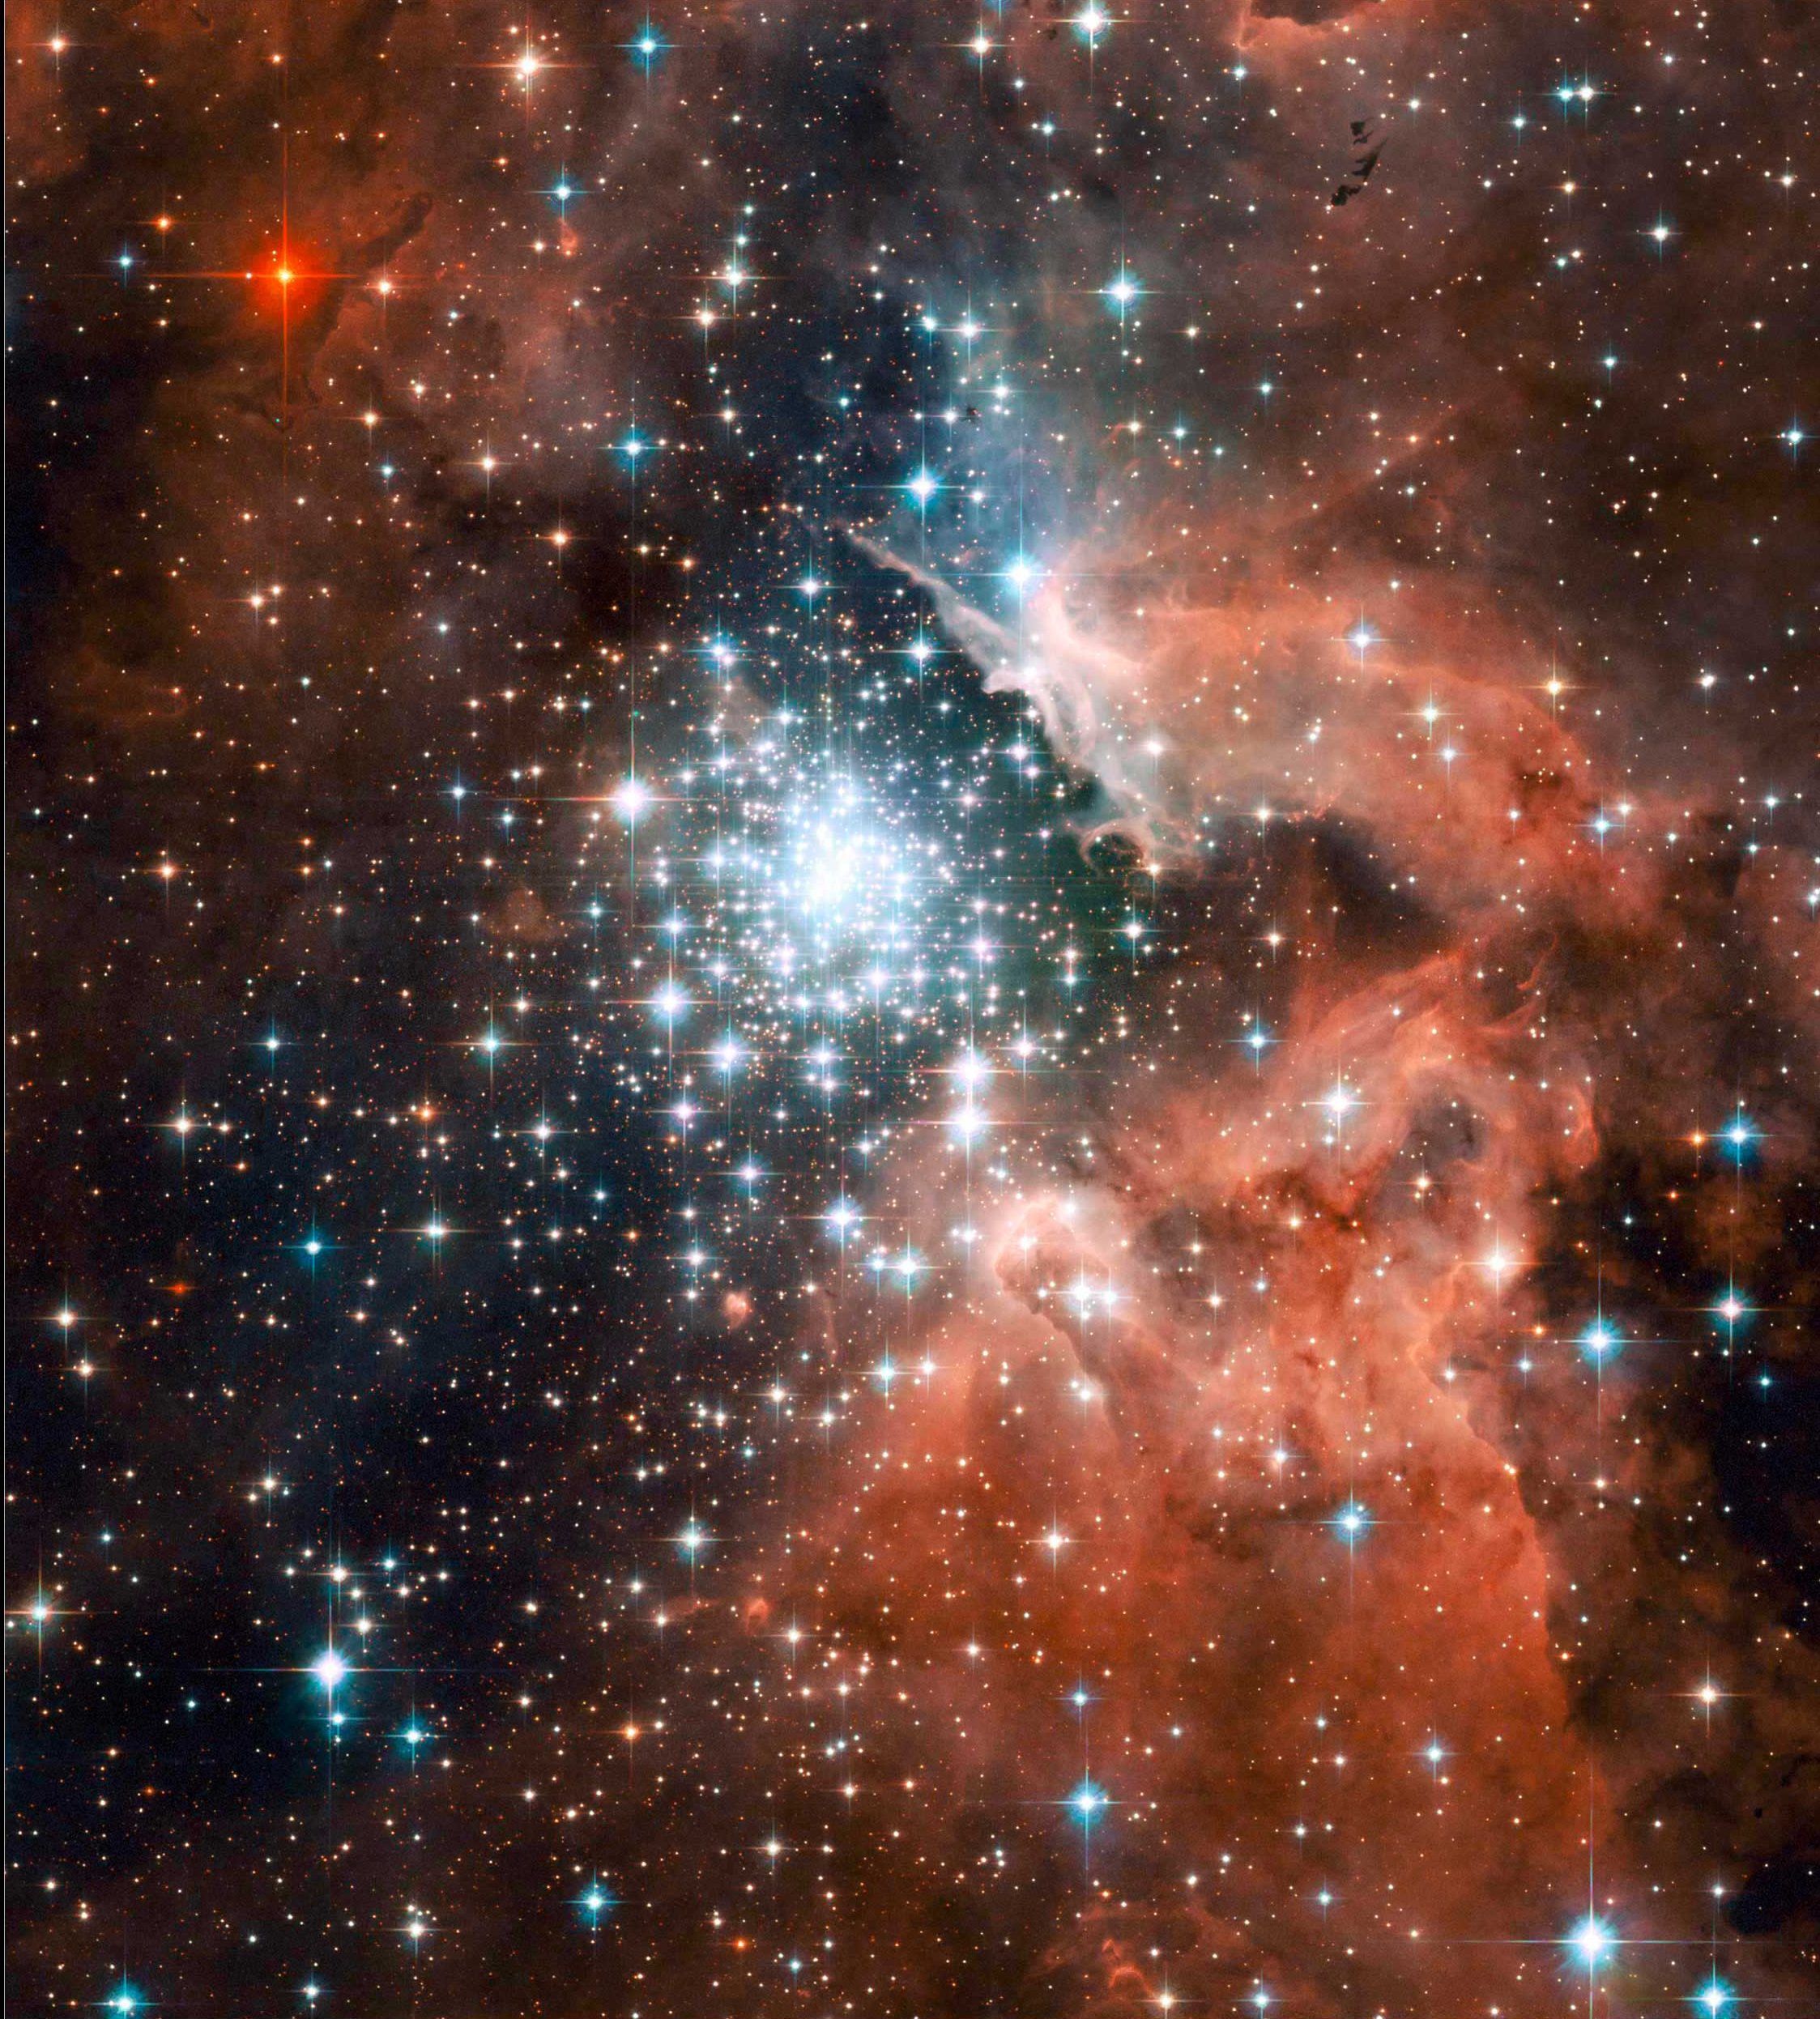

In [23]:
test.ipython_display()

In [ ]:
# video = VideoFileClip(VID_FILES[0])

In [ ]:
# print('Frames/Second:', video.reader.fps)
# print('Frame Count:', video.reader.nframes)
# print('Video Length:', video.duration)

In [ ]:
# print_frame(video.get_frame(np.random.randint(0, video.duration)))

# Split Video In To Clips

# Audio

In [2]:
import matplotlib.pyplot as plt

In [3]:
saved_data = get_saved_audio(AUD_FILE)
if saved_data:
    audio_data, CHUNK, RATE = saved_data
else:
    audio_data, CHUNK, RATE = get_audio_data(AUD_FILE)

10685440it [01:54, 93028.71it/s]                                                                                       


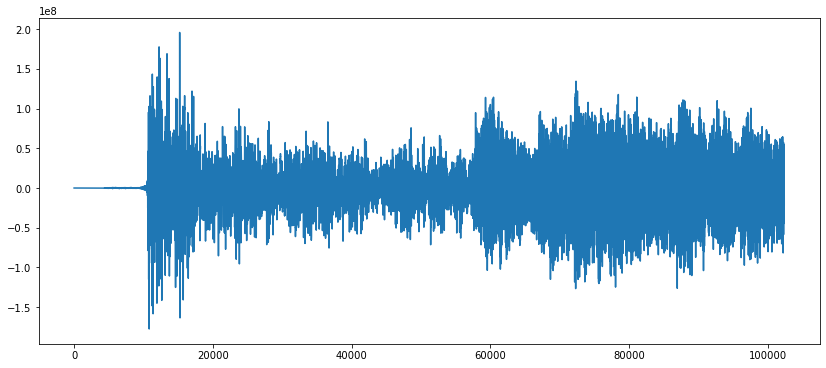

In [4]:
plt.figure(figsize=(14,6))
plt.plot([v for chunk in audio_data[:100] for v in chunk])
plt.show()

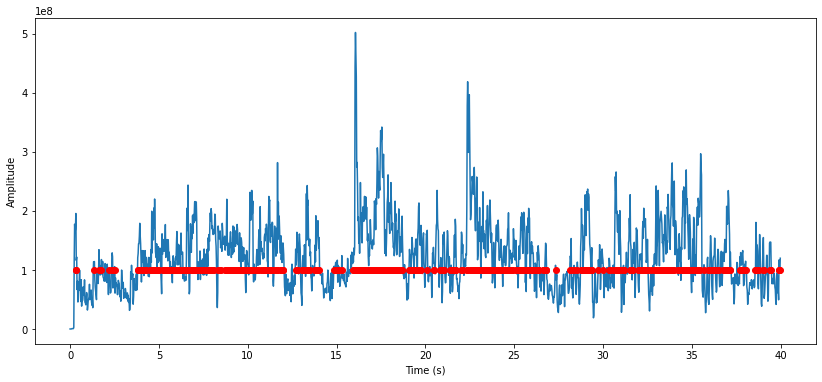

In [9]:
max_data = [np.max(r) for r in audio_data]
seconds = [(CHUNK / RATE)*i for i in range(len(audio_data))]

plot_time = 40 # seconds
amp_thresh = 100000000

# Get samples above threshold amplitude if they are rising and not falling
abv_thresh = [np.max(d) > amp_thresh and is_increasing(d) for d in audio_data]

to_idx = np.where(np.array(seconds) > plot_time)[0][0] # Convert plot time in seconds to matching index
plt.figure(figsize=(14,6))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(seconds[:to_idx], max_data[:to_idx])
plt.plot([seconds[i] for i, v in enumerate(abv_thresh[:to_idx]) if v == True], [amp_thresh for v in abv_thresh[:to_idx] if v == True], 'ro')
plt.show()

In [ ]:
times = get_split_times(audio_data, RATE, amp_thresh, chunk=CHUNK)

In [ ]:
# ITERATION_CNT = 100

In [ ]:
# CHUNK = Audio.CHUNK
# Audio.open_stream()
# p = Audio.p
# wf = Audio.wf
# data = wf.readframes(CHUNK)

# fifo_long = Audio.init_fifo_from_preprocessed_data(n_data, Audio.FIFO_LONG_LEN)
# fifo_short = Audio.init_fifo_from_preprocessed_data(n_data, Audio.FIFO_SHORT_LEN)

# for sample_idx in range(len(n_data)):
#     Audio.stream.write(data)
#     data = wf.readframes(CHUNK)
#     if len(data) < CHUNK:
#         break

#     lfb = n_data[sample_idx]  # Log of the frequencies for each bucket

#     # Get rolling average & min
#     roll_delta, fifo_long, fifo_short = Audio.get_roll_delta(fifo_long, fifo_short, lfb)
#     #print(np.max(roll_delta))
#     if np.max(roll_delta) > 0.05:
#         print(np.max(roll_delta))
# #     if np.max(lfb) > .37:
# #         print(np.max(lfb))
    
#     if sample_idx > ITERATION_CNT:
#         break

# Build Music Video

In [ ]:
clip_generator = get_clips(VID_FILES, single=True)

In [ ]:
start_time = time.time()
mv_clips = build_mv_clips(times, clip_generator)
print('Time taken:', (time.time() - start_time)/60)

In [ ]:
music_video = concatenate_videoclips(mv_clips)

In [ ]:
music_audio = AudioFileClip(FINAL_AUDIO).subclip(0, music_video.duration)

In [ ]:
final_music_video = music_video.set_audio(music_audio)

In [ ]:
export_name = get_unique_filename(EXPORT_FILENAME)

In [ ]:
final_music_video.write_videofile(export_name)